In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from skimage.feature import local_binary_pattern, hog

# Load the dataset
data = loadmat('YaleB_32x32.mat')  # Replace with the actual path to the .mat file
features = data['fea']
labels = data['gnd'].flatten()

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Set the random seed for reproducibility
np.random.seed(42)

# Define the values of m
m_values = [10, 20, 30, 40, 50]

# Define the number of neighbors (k)
k = 1

# Define a list to store the classification errors
classification_errors = []

# Iterate over each value of m
for m in m_values:
    train_features = []
    train_labels = []
    test_features = []
    test_labels = []
    
    # Iterate over each individual
    for i in range(38):
        # Get the indices of all images for the current individual
        indices = np.where(labels == i+1)[0]
        
        # Randomly select m images per individual for the training set
        train_indices = np.random.choice(indices, size=m, replace=False)
        
        # Add the selected images and labels to the training set
        train_features.extend(features[train_indices])
        train_labels.extend(labels[train_indices])
        
        # Add the remaining images and labels to the test set
        test_indices = np.setdiff1d(indices, train_indices)
        test_features.extend(features[test_indices])
        test_labels.extend(labels[test_indices])
    
    # Convert the lists to numpy arrays
    train_features = np.array(train_features)
    train_labels = np.array(train_labels)
    test_features = np.array(test_features)
    test_labels = np.array(test_labels)
    
    # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Fit the classifier to the training data
    knn.fit(train_features, train_labels)
    
    # Predict the labels for the test data
    test_predictions = knn.predict(test_features)
    
    # Calculate the classification error
    classification_error = 1 - accuracy_score(test_labels, test_predictions)
    
    # Append the classification error to the list
    classification_errors.append(classification_error)

# Print the classification errors
for m, error in zip(m_values, classification_errors):
    print(f"m = {m}: Classification Error = {error}")


m = 10: Classification Error = 0.56047197640118
m = 20: Classification Error = 0.4087061668681983
m = 30: Classification Error = 0.34693877551020413
m = 40: Classification Error = 0.28299776286353473
m = 50: Classification Error = 0.24124513618677046


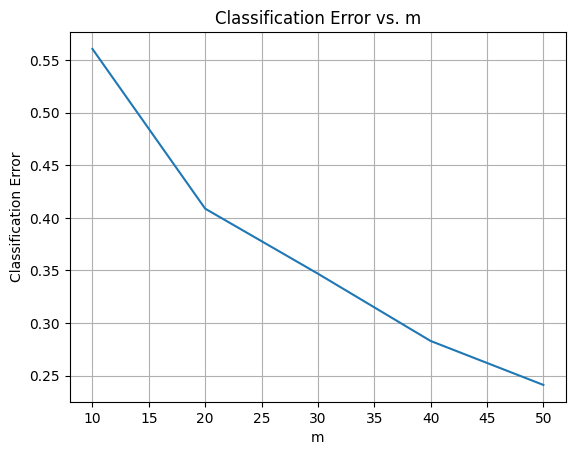

In [3]:
import matplotlib.pyplot as plt

# Plot the classification errors
plt.plot(m_values, classification_errors)
plt.xlabel('m')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. m')
plt.grid(True)  # Add grid lines
plt.show()


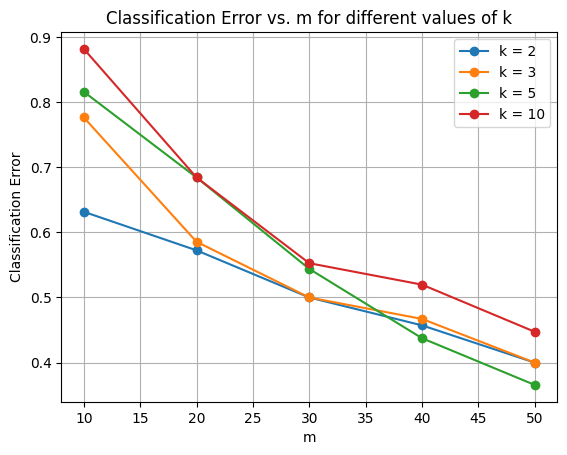

In [4]:
# Define the values of m
m_values = [10, 20, 30, 40, 50]

# Define the values of k
k_values = [2, 3, 5, 10]

# Define a dictionary to store the classification errors for each k and m
classification_errors = {}

# Iterate over each value of k
for k in k_values:
    # Define a list to store the classification errors
    errors = []
    
    # Iterate over each value of m
    for m in m_values:
        train_features = []
        train_labels = []
        test_features = []
        test_labels = []

        # Iterate over each individual
        for i in range(38):
            # Get the indices of all images for the current individual
            indices = np.where(labels == i+1)[0]

            # Randomly select m images per individual for the training set
            train_indices = np.random.choice(indices, size=m, replace=False)

            # Add the selected images and labels to the training set
            train_features.extend(features[train_indices])
            train_labels.extend(labels[train_indices])

        # Convert the lists to numpy arrays
        train_features = np.array(train_features)
        train_labels = np.array(train_labels)

        # Partition the training set into training and testing subsets
        test_indices = np.random.choice(len(train_features), size=int(0.2 * len(train_features)), replace=False)
        test_features = train_features[test_indices]
        test_labels = train_labels[test_indices]

        train_features = np.delete(train_features, test_indices, axis=0)
        train_labels = np.delete(train_labels, test_indices)

        # Create a k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        # Fit the classifier to the training data
        knn.fit(train_features, train_labels)

        # Predict the labels for the test data
        test_predictions = knn.predict(test_features)

        # Calculate the classification error
        classification_error = 1 - accuracy_score(test_labels, test_predictions)

        # Append the classification error to the list
        errors.append(classification_error)
    
    # Store the classification errors for the current k
    classification_errors[k] = errors

# Plot the error rate against k for different values of m
for m, errors in classification_errors.items():
    plt.plot(m_values, errors, label=f'k = {m}', marker='o')

plt.xlabel('m')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. m for different values of k')
plt.legend()
plt.grid(True)
plt.show()


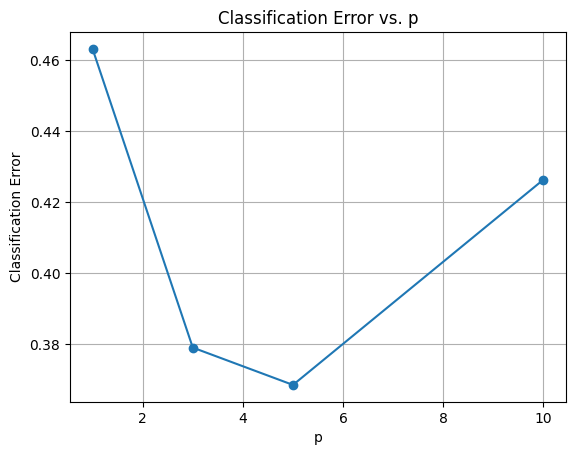

In [5]:
# Define the values of m and k
m = 30
k = 3

# Define the values of p
p_values = [1, 3, 5, 10]

# Define a list to store the classification errors
classification_errors = []

# Iterate over each value of p
for p in p_values:
    # Create a k-NN classifier with the specified p value
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)

    # Fit the classifier to the training data
    knn.fit(train_features, train_labels)

    # Predict the labels for the test data
    test_predictions = knn.predict(test_features)

    # Calculate the classification error
    classification_error = 1 - accuracy_score(test_labels, test_predictions)

    # Append the classification error to the list
    classification_errors.append(classification_error)

# Plot the error rate against p
plt.plot(p_values, classification_errors, marker='o')
plt.xlabel('p')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. p')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import local_binary_pattern, hog

# Load the dataset
data = loadmat('YaleB_32x32.mat')  # Adjust the path to your dataset file
features = data['fea']
labels = data['gnd'].flatten()
image_shape = (32, 32)  # Assuming images are 32x32 pixels

def extract_lbp_features(image, P=8, R=1):
    lbp = local_binary_pattern(image.reshape(image_shape), P, R, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

def extract_hog_features(image):
    fd = hog(image.reshape(image_shape), orientations=8, pixels_per_cell=(8, 8),
             cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False)
    return fd

# Define the value of m
m = 30

# Define the values of k and p
k = 3
p_values = [1, 2]

# Initialize the dictionary to store errors
errors = {'Pixel Intensity': [], 'LBP': [], 'HOG': []}

# Iterate over each value of p
for p in p_values:
    # Iterate over each feature extraction method
    for feature_type in ['Pixel Intensity', 'LBP', 'HOG']:
        classification_errors = []
        
        train_features, train_labels = [], []
        test_features, test_labels = [], []

        # Iterate over each individual
        for i in range(1, 39):  # Assuming labels are 1-based
            indices = np.where(labels == i)[0]
            np.random.shuffle(indices)
            train_indices = indices[:m]
            test_indices = indices[m:]

            if feature_type == 'Pixel Intensity':
                train_features.extend(features[train_indices])
                test_features.extend(features[test_indices])
            elif feature_type == 'LBP':
                for index in train_indices:
                    train_features.append(extract_lbp_features(features[index]))
                for index in test_indices:
                    test_features.append(extract_lbp_features(features[index]))
            elif feature_type == 'HOG':
                for index in train_indices:
                    train_features.append(extract_hog_features(features[index]))
                for index in test_indices:
                    test_features.append(extract_hog_features(features[index]))

            train_labels.extend(labels[train_indices])
            test_labels.extend(labels[test_indices])

        # Train and test the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        classification_error = 1 - accuracy_score(test_labels, predictions)
        classification_errors.append(classification_error)

        errors[feature_type].append(classification_errors)

# Print the classification errors
for feature_type, error_lists in errors.items():
    for p, error_list in zip(p_values, error_lists):
        print(f"Error rates for {feature_type} features with p = {p}: {error_list}")


Error rates for Pixel Intensity features with p = 1: [0.48508634222919933]
Error rates for Pixel Intensity features with p = 2: [0.4419152276295133]
Error rates for LBP features with p = 1: [0.8814756671899528]
Error rates for LBP features with p = 2: [0.8673469387755102]
Error rates for HOG features with p = 1: [0.5392464678178963]
Error rates for HOG features with p = 2: [0.5832025117739403]


The observed lower error rate for using pixel intensities as features with \( p = 2 \) in the k-Nearest Neighbors (k-NN) classifier can be attributed to several factors related to the nature of the dataset, the characteristics of the pixel intensity features, and the choice of the distance metric (\( p = 2 \) corresponds to the Euclidean distance). Here are some key points that explain why this configuration might yield the lowest error rate:

1. **Euclidean Distance Suitability for Pixel Intensities**: The Euclidean distance (\( p = 2 \)) is particularly effective for datasets where the straight-line distance between points in the feature space closely corresponds to actual similarities. For image pixel intensities, this means that images of the same individual (under similar conditions) are likely to be closer together in the pixel intensity space. Thus, the Euclidean metric is well-suited for capturing the nuances of facial similarities and differences based on raw pixel values.

2. **Homogeneity of the Data**: The YaleB_32x32 dataset consists of grayscale images under various lighting conditions. Pixel intensities can directly capture variations caused by lighting changes, which are a significant aspect of this dataset. Since the Euclidean distance effectively measures the aggregate difference across all pixel values, it can sensitively detect even subtle differences in lighting and contrast, leading to more accurate classification.

3. **Inherent Spatial Information in Pixel Intensities**: Pixel intensity values contain inherent spatial information about the image, such as edges, contours, and texture patterns, which are critical for recognizing faces. The k-NN classifier with Euclidean distance can leverage this information without the need for explicit feature extraction techniques like LBP or HOG, which may introduce information loss or emphasize aspects less relevant for distinguishing between the individuals in this particular dataset.

4. **Dimensionality and Overfitting**: While high-dimensional data (like raw pixel intensities) can sometimes lead to overfitting, in the case of a well-structured dataset like YaleB_32x32, where each class (individual) has a distinct appearance, the high dimensionality may actually help in distinguishing between classes. Since the Euclidean distance considers all dimensions equally, it can take advantage of this high-dimensional space to improve classification accuracy.

5. **Generalization of Euclidean Distance**: The Euclidean distance is a general-purpose distance metric that does not assume any specific distribution of the data. Its effectiveness in this context suggests that the spatial distribution of pixel intensities across different images of faces naturally lends itself to Euclidean geometry. This can lead to better generalization when new images are introduced to the model.

In summary, the combination of the Euclidean distance metric's properties with the characteristics of the YaleB_32x32 dataset and the nature of pixel intensity features likely contributes to the observed lower error rate. The direct, untransformed representation of faces through pixel intensities, coupled with the straightforward interpretation of distances in this feature space by the Euclidean metric, aligns well with the task of face recognition in this context.

k: 1, p: 1, Accuracy: 0.5821256038647343
k: 1, p: 2, Accuracy: 0.6231884057971014
k: 3, p: 1, Accuracy: 0.48792270531400966
k: 3, p: 2, Accuracy: 0.5241545893719807
k: 5, p: 1, Accuracy: 0.47101449275362317
k: 5, p: 2, Accuracy: 0.5096618357487923
k: 7, p: 1, Accuracy: 0.463768115942029
k: 7, p: 2, Accuracy: 0.49033816425120774
k: 9, p: 1, Accuracy: 0.4613526570048309
k: 9, p: 2, Accuracy: 0.4830917874396135

Best Combination -> k: 1, p: 2, Validation Set Accuracy: 0.6231884057971014
Test Set Error Rate: 0.3526315789473684, with k: 1 and p: 2


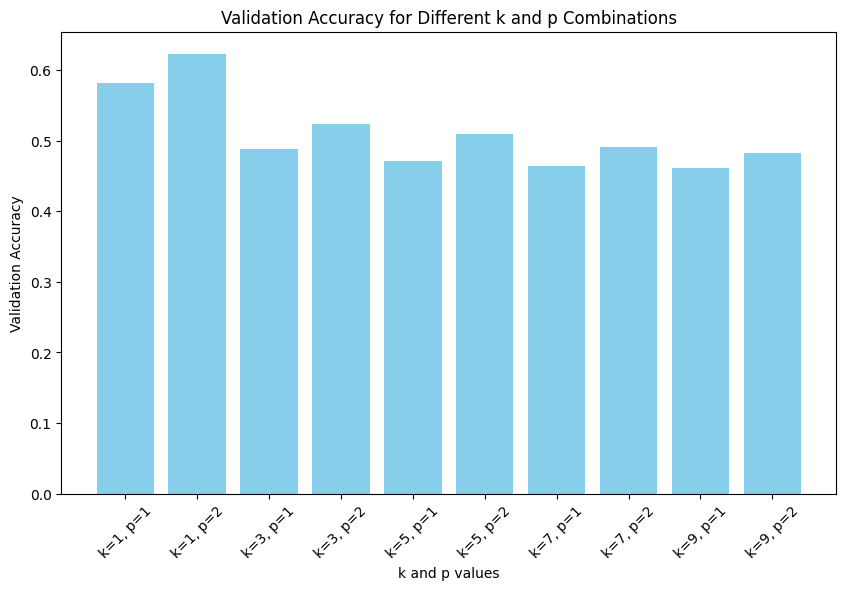

In [7]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = loadmat('YaleB_32x32.mat')  # Adjust the path to your dataset file
features = data['fea']
labels = data['gnd'].flatten()

np.random.seed(42)  # Ensure reproducibility

# Split data into test and initial training set
test_features = []
test_labels = []
train_features = []
train_labels = []

for i in np.unique(labels):
    indices = np.where(labels == i)[0]
    np.random.shuffle(indices)
    test_indices = indices[:20]
    train_indices = indices[20:]
    
    test_features.extend(features[test_indices])
    test_labels.extend(labels[test_indices])
    train_features.extend(features[train_indices])
    train_labels.extend(labels[train_indices])

# Further split the training set into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.25, random_state=42)

# Parameter optimization
k_values = [1, 3, 5, 7, 9]
p_values = [1, 2]
results = {}  # Store accuracy for all combinations

best_accuracy = 0
best_k = 0
best_p = 0

for k in k_values:
    for p in p_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_val)
        accuracy = accuracy_score(y_val, predictions)
        results[(k, p)] = accuracy
        print(f"k: {k}, p: {p}, Accuracy: {accuracy}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_p = p

print(f"\nBest Combination -> k: {best_k}, p: {best_p}, Validation Set Accuracy: {best_accuracy}")

# Evaluate on the test set
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=best_p)
knn_optimized.fit(X_train, y_train)  # Training on the entire training set
test_predictions = knn_optimized.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
error_rate = 1 - test_accuracy

print(f"Test Set Error Rate: {error_rate}, with k: {best_k} and p: {best_p}")

# Visualization
kp_pairs = [f"k={k}, p={p}" for k, p in results.keys()]
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(kp_pairs, accuracies, color='skyblue')
plt.xlabel('k and p values')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different k and p Combinations')
plt.xticks(rotation=45)
plt.show()
